In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May  2 16:56:07 2019

@author: Ethan
"""
exec(open("../util/setupConsole.py").read())
    
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import pandas as pd
import scipy.stats
import seaborn as sns
import el_build_temp_pp_model
import pickle, gzip
import random
import sys, os

#dataDir = '
dataDirDiscovery = '/dartfs-hpc/rc/lab/C/CMIG/ecoffel/data/projects/electricity'

tempVar = 'txSummer'
qsVar = 'qsGrdcAnomSummer'

modelPower = 'pow2-noInteraction'

plotFigs = False
dumpData = False

pcVal = -2
fuelVal = -2

In [51]:

print('building models...')
models, df, plantIds, plantCooling, plantFuel, plantAge, plantUSorEU, plantYears, \
                plantTxData, plantQsData = el_build_temp_pp_model.buildNonlinearTempQsPPModel(tempVar, qsVar, 1)



building models...
0% complete


In [31]:
ind = np.where(plantIds > 0)[0]
plantIds = plantIds[ind]
plantYears = plantYears[ind]
plantAge = plantAge[ind]

if pcVal == -2:
    plantCooling = plantCooling[ind]
else:
    plantCooling = np.array([pcVal]*len(ind))

if fuelVal == -2:
    plantFuel = plantFuel[ind]
else:
    plantFuel = np.array([fuelVal]*len(ind))
    
plantUSorEU = plantUSorEU[ind]

# plantIdsTmp = np.unique(plantIds)
# plantIds = np.array(list(np.unique(plantIds))*len(np.unique(plantYears)))
# tmp = []
# for p in np.unique(plantYears):
#     tmp.extend([p]*len(plantIdsTmp))
# plantYears = np.array(tmp)

# plantCoolingTmp = np.unique(plantCooling)
# nn = np.where(~np.isnan(plantCoolingTmp))[0]
# plantCoolingTmp = plantCoolingTmp[nn]
# plantCooling = np.array(list(plantCoolingTmp)*int(len(plantYears)/len(plantCoolingTmp)))


In [36]:
page = []
pcooling = []
for i in np.unique(plantIds):
    ind = np.where(plantIds==i)[0][0]
    if plantAge[ind] > 1000:
        page.append(plantAge[ind])
    else:
        page.append(np.nan)
    
    pcooling.append(plantCooling[ind])
page = np.array(page)
pcooling = np.array(pcooling)

In [46]:
cooling70 = pcooling[page==1970]
coolingUnspec70 = len(cooling70[cooling70==-1])
coolingOT70 = len(cooling70[cooling70==0])
coolingRC70 = len(cooling70[cooling70==1])

cooling80 = pcooling[page==1980]
coolingUnspec80 = len(cooling80[cooling80==-1])
coolingOT80 = len(cooling80[cooling80==0])
coolingRC80 = len(cooling80[cooling80==1])

cooling90 = pcooling[page==1990]
coolingUnspec90 = len(cooling90[cooling90==-1])
coolingOT90 = len(cooling90[cooling90==0])
coolingRC90 = len(cooling90[cooling90==1])

coolingUnspecNoAge = len(pcooling==-1)


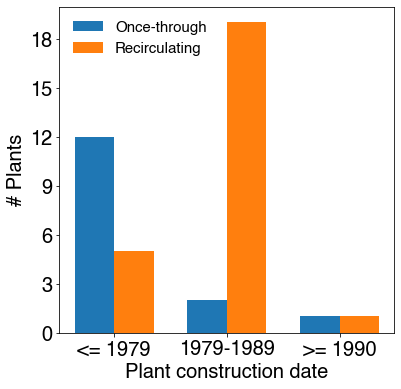

In [49]:

coolingLabels = ['<= 1979', '1979-1989', '>= 1990']
coolingOT = [coolingOT70, coolingOT80, coolingOT90]
coolingRC = [coolingRC70, coolingRC80, coolingRC90]

width = 0.35
x = np.arange(len(coolingLabels))

plt.figure(figsize=(6,6))
plt.bar(x-width/2, coolingOT, width, label='Once-through')
plt.bar(x+width/2, coolingRC, width, label='Recirculating')
plt.xlabel('Plant construction date', fontsize=20)
plt.ylabel('# Plants', fontsize=20)
plt.yticks(np.arange(0, 19, 3), fontsize=20)
plt.xticks(x, fontsize=20)
plt.gca().set_xticklabels(coolingLabels)
leg = plt.legend(prop = {'size':15, 'family':'Helvetica'}, loc = 'upper left')
leg.get_frame().set_linewidth(0.0)

if plotFigs:
    plt.savefig('plant-age-cooling-dist.png', format='png', dpi=500, bbox_inches = 'tight', pad_inches = 0.01, transparent=True)

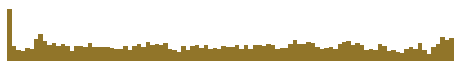

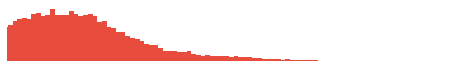

In [34]:
snsColors = sns.color_palette(["#3498db", "#e74c3c"])

plt.figure(figsize=(8,1))
if 'percentile' in qsVar.lower():
    plt.xlim([0,1])
else:
    plt.xlim([-4, 4])
plt.grid(True, color=[.9, .9, .9])
n, bins, patches = plt.hist(plantQsData, bins=100, density=True, color='#917529');

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.gca().axis('off')

if plotFigs:
    plt.savefig('runoff-dist-%s.png'%qsVar, format='png', dpi=500, bbox_inches = 'tight', pad_inches = 0, transparent=True)

plt.figure(figsize=(8,1))
plt.xlim([27, 50])
plt.grid(True, color=[.9, .9, .9])
n, bins, patches = plt.hist(plantTxData, bins=100, density=True, color=snsColors[1]);

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.gca().axis('off')

if plotFigs:
    plt.savefig('temp-dist-%s.png'%tempVar, format='png', dpi=500, bbox_inches = 'tight', pad_inches = 0, transparent=True)

In [35]:

#txrange = np.arange(20,51,1)
#qsrange = [1]
#tBase = 27
#qBase = 1
#nModelsTxRange = []
#for t in txrange:
#    nModels = 0
#    for m in range(len(models)):
#        basePred = models[m].get_prediction([1, tBase, tBase**2, qBase, qBase**2, qBase*tBase, (qBase**2)*(tBase**2), 0])
#        cBase = basePred.conf_int()[0]
#        pred = models[m].predict([1, t, t**2, qBase, qBase**2, qBase*t, (qBase**2)*(t**2), 0])
#        
#        if pred < cBase[0] or pred > cBase[1]:
#            nModels += 1
#    nModelsTxRange.append(nModels)
#nModelsTxRange = np.array(nModelsTxRange)/1000.0*100
#
#plt.figure(figsize=(4,4))
#plt.xlim([20,50])
#plt.ylim([0,101])
#plt.grid(True, color=[.9, .9, .9])
#
#plt.plot(txrange, nModelsTxRange, 'k-', linewidth = 2)
#
#plt.gca().set_xticks(range(20,51,5))
#plt.gca().set_yticks([0, 25, 50, 75, 100])
#
#for tick in plt.gca().xaxis.get_major_ticks():
#    tick.label.set_fontname('Helvetica')
#    tick.label.set_fontsize(14)
#for tick in plt.gca().yaxis.get_major_ticks():
#    tick.label.set_fontname('Helvetica')    
#    tick.label.set_fontsize(14)
#
#plt.xlabel('Tx ($\degree$C)', fontname = 'Helvetica', fontsize=16)
#plt.ylabel('% bootstraps significant', fontname = 'Helvetica', fontsize=16)
#
#x0,x1 = plt.gca().get_xlim()
#y0,y1 = plt.gca().get_ylim()
#plt.gca().set_aspect(abs(x1-x0)/abs(y1-y0))
#
#if plotFigs:
#    plt.savefig('significant-bootstraps.eps', format='eps', dpi=500, bbox_inches = 'tight', pad_inches = 0)


In [36]:
plantMeanTemps = np.nanmean(plantTxData)
plantMeanRunoff = np.nanmean(plantQsData)

# find fit percentiles for temperature
t = 50
if 'percentile' in qsVar.lower():
    q = 0.5
else:
    q = 0

print('finding regression percentiles for temperature')
pcEval = []
dfpred = pd.DataFrame({'T1':[t]*len(plantIds), 'T2':[t**2]*len(plantIds), \
                         'QS1':[q]*len(plantIds), 'QS2':[q**2]*len(plantIds), \
                         'QST':[t*q]*len(plantIds), 'QS2T2':[(t**2)*(q**2)]*len(plantIds), \
                         'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge, \
                         'USorEU':plantUSorEU})
for i in range(len(models)):
    pcEval.append(np.nanmean(models[i].predict(dfpred)))

pc10 = np.percentile(pcEval, 10)
pc50 = np.percentile(pcEval, 50)
pc90 = np.percentile(pcEval, 90)

indPc10 = np.where(abs(pcEval-pc10) == np.nanmin(abs(pcEval-pc10)))[0]
indPc50 = np.where(abs(pcEval-pc50) == np.nanmin(abs(pcEval-pc50)))[0]
indPc90 = np.where(abs(pcEval-pc90) == np.nanmin(abs(pcEval-pc90)))[0]


# find fit percentiles for runoff
t = 32#np.nanmean(plantMeanTemps)
if 'percentile' in qsVar.lower():
    q = 0
else:
    q = -4

print('finding regression percentiles for runoff')
pcEval = []
dfpred = pd.DataFrame({'T1':[t]*len(plantIds), 'T2':[t**2]*len(plantIds), \
                         'QS1':[q]*len(plantIds), 'QS2':[q**2]*len(plantIds), \
                         'QST':[t*q]*len(plantIds), 'QS2T2':[(t**2)*(q**2)]*len(plantIds), \
                         'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge, \
                         'USorEU':plantUSorEU})
for i in range(len(models)):
    pcEval.append(np.nanmean(models[i].predict(dfpred)))

pc10 = np.percentile(pcEval, 10)
pc50 = np.percentile(pcEval, 50)
pc90 = np.percentile(pcEval, 90)

indPcQs10 = np.where(abs(pcEval-pc10) == np.nanmin(abs(pcEval-pc10)))[0]
indPcQs50 = np.where(abs(pcEval-pc50) == np.nanmin(abs(pcEval-pc50)))[0]
indPcQs90 = np.where(abs(pcEval-pc90) == np.nanmin(abs(pcEval-pc90)))[0]


finding regression percentiles for temperature
finding regression percentiles for runoff


In [37]:

pPolyData = {'pcModel10':models[indPc10], 'pcModel50':models[indPc50], 'pcModel90':models[indPc90], \
             'plantIds':plantIds, 'plantYears':plantYears, 'plantCooling':plantCooling, 'plantFuel':plantFuel, \
             'plantAge':plantAge, 'USorEU':plantUSorEU}
if dumpData:
    print('dumping model data')
    prcStr = ''
    if 'percentile' in qsVar.lower():
        prcStr = '-perc'
    if 'grdc' in qsVar.lower():
        polyDataTitle = 'pPolyData-grdc-%s%s'%(modelPower, prcStr)
    elif 'nldas' in qsVar.lower():
        polyDataTitle = 'pPolyData-nldas-%s%s'%(modelPower, prcStr)
    else:
        polyDataTitle = 'pPolyData-gldas-%s%s'%(modelPower, prcStr)
    with gzip.open('%s/script-data/%s.dat'%(dataDirDiscovery, polyDataTitle), 'wb') as f:
        pickle.dump(pPolyData, f)


In [38]:
xd = np.linspace(20, 50, 25)
if 'percentile' in qsVar.lower():
    qd = np.array([.5]*25)
else:
    qd = np.array([np.nanmean(plantMeanRunoff)]*25)

print('calculating regression across T distribution')
ydAll = np.zeros([len(models), len(xd)])
ydAll[ydAll == 0] = np.nan

for k in range(len(xd)):
    print('k = %d'%(k))    
    dfpred = pd.DataFrame({'T1':[xd[k]]*len(plantIds), 'T2':[xd[k]**2]*len(plantIds), \
                     'QS1':[qd[k]]*len(plantIds), 'QS2':[qd[k]**2]*len(plantIds), \
                     'QST':[xd[k]*qd[k]]*len(plantIds), 'QS2T2':[(xd[k]**2)*(qd[k]**2)]*len(plantIds), \
                     'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge, 'USorEU':plantUSorEU})
    for i in range(len(models)):
        ydAll[i, k] = np.nanmean(models[i].predict(dfpred))
        

calculating regression across T distribution
k = 0
k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
k = 21
k = 22
k = 23
k = 24


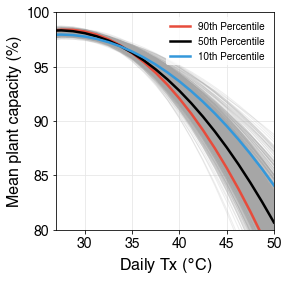

In [39]:
ydAll = np.array(ydAll)

yd10 = []
yd50 = []
yd90 = []


for k in range(len(xd)):
    
    dfpred = pd.DataFrame({'T1':[xd[k]]*len(plantIds), 'T2':[xd[k]**2]*len(plantIds), \
                     'QS1':[qd[k]]*len(plantIds), 'QS2':[qd[k]**2]*len(plantIds), \
                     'QST':[xd[k]*qd[k]]*len(plantIds), 'QS2T2':[(xd[k]**2)*(qd[k]**2)]*len(plantIds), \
                     'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge, 'USorEU':plantUSorEU})
    yd10.append(np.nanmean(models[indPc10[0]].predict(dfpred)))
    yd50.append(np.nanmean(models[indPc50[0]].predict(dfpred)))   
    yd90.append(np.nanmean(models[indPc90[0]].predict(dfpred)))



baseY = 80
plotYTicks = [80, 85, 90, 95, 100]

plt.figure(figsize=(4,4))
plt.xlim([27, 50])
plt.ylim([baseY, 100])
plt.grid(True, color=[.9, .9, .9])

plt.plot(xd, ydAll.T, '-', linewidth = 1, color = [.65, .65, .65], alpha = .2)
p1 = plt.plot(xd, yd10, '-', linewidth = 2.5, color = snsColors[1], label='90th Percentile')
p2 = plt.plot(xd, yd50, '-', linewidth = 2.5, color = [0, 0, 0], label='50th Percentile')
p3 = plt.plot(xd, yd90, '-', linewidth = 2.5, color = snsColors[0], label='10th Percentile')


colors = plt.get_cmap('Reds')

plt.gca().set_xticks(range(30, 51, 5))
plt.gca().set_yticks(plotYTicks)

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontname('Helvetica')
    tick.label.set_fontsize(14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontname('Helvetica')    
    tick.label.set_fontsize(14)

plt.xlabel('Daily Tx ($\degree$C)', fontname = 'Helvetica', fontsize=16)
plt.ylabel('Mean plant capacity (%)', fontname = 'Helvetica', fontsize=16)

#                 bbox_to_anchor=(0.01, 0.3)
leg = plt.legend(prop = {'size':10, 'family':'Helvetica'}, loc = 'upper right')
leg.get_frame().set_linewidth(0.0)
    
x0,x1 = plt.gca().get_xlim()
y0,y1 = plt.gca().get_ylim()
plt.gca().set_aspect(abs(x1-x0)/abs(y1-y0))

if plotFigs:
    plt.savefig('hist-pc-tx-%s-%s-regression-%s.png'%(tempVar, qsVar, modelPower), format='png', dpi=500, bbox_inches = 'tight', pad_inches = 0)


In [40]:
xd = np.array([32]*25)#np.array([np.nanmean(plantMeanTemps)]*25)
if 'percentile' in qsVar.lower():
    qd = np.linspace(0, 1, 25)
else:
    qd = np.linspace(-4, 4, 25)

ydAll = np.zeros([len(models), len(xd)])
ydAll[ydAll == 0] = np.nan

for k in range(len(xd)):
    print('k = %d'%(k))    
    dfpred = pd.DataFrame({'T1':[xd[k]]*len(plantIds), 'T2':[xd[k]**2]*len(plantIds), \
                     'QS1':[qd[k]]*len(plantIds), 'QS2':[qd[k]**2]*len(plantIds), \
                     'QST':[xd[k]*qd[k]]*len(plantIds), 'QS2T2':[(xd[k]**2)*(qd[k]**2)]*len(plantIds), \
                     'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge, 'USorEU':plantUSorEU})
    for i in range(len(models)):
        ydAll[i, k] = np.nanmean(models[i].predict(dfpred))
        

k = 0
k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
k = 21
k = 22
k = 23
k = 24


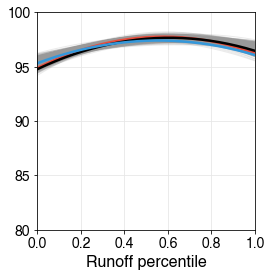

In [41]:
ydAll = np.array(ydAll)

yd10 = []
yd50 = []
yd90 = []

for k in range(len(xd)):
    dfpred = pd.DataFrame({'T1':[xd[k]]*len(plantIds), 'T2':[xd[k]**2]*len(plantIds), \
                     'QS1':[qd[k]]*len(plantIds), 'QS2':[qd[k]**2]*len(plantIds), \
                     'QST':[xd[k]*qd[k]]*len(plantIds), 'QS2T2':[(xd[k]**2)*(qd[k]**2)]*len(plantIds), \
                     'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge, 'USorEU':plantUSorEU})
    yd10.append(np.nanmean(models[indPc10[0]].predict(dfpred)))
    yd50.append(np.nanmean(models[indPc50[0]].predict(dfpred)))   
    yd90.append(np.nanmean(models[indPc90[0]].predict(dfpred)))
    

yd10 = np.array(yd10)
yd50 = np.array(yd50)
yd90 = np.array(yd90)

plt.figure(figsize=(4,4))
if 'percentile' in qsVar.lower():
    plt.xlim([0,1])
else:
    plt.xlim([-4, 4])
plt.ylim([baseY, 100])
plt.grid(True, color=[.9, .9, .9])

plt.plot(qd, ydAll.T, '-', linewidth = 1, color = [.6, .6, .6], alpha = .2)
p1 = plt.plot(qd, yd10, '-', linewidth = 2.5, color = snsColors[1], label='90th Percentile')
p2 = plt.plot(qd, yd50, '-', linewidth = 2.5, color = [0, 0, 0], label='50th Percentile')
p3 = plt.plot(qd, yd90, '-', linewidth = 2.5, color = snsColors[0], label='10th Percentile')

colors = plt.get_cmap('BrBG')

# for m in plantMeanRunoff:
#    plt.plot([m, m], [baseY, baseY+2], color=colors(m/max(plantMeanRunoff)), linewidth=1)

plt.gca().set_yticks(plotYTicks)
if 'percentile' in qsVar.lower():
    plt.gca().set_xticks(np.arange(0, 1.1, .2))
else:
    plt.gca().set_xticks(np.arange(-4, 4.1, 1))

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontname('Helvetica')
    tick.label.set_fontsize(14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontname('Helvetica')    
    tick.label.set_fontsize(14)

plt.xlabel('Runoff anomaly (SD)', fontname = 'Helvetica', fontsize=16)
plt.xlabel('Runoff percentile', fontname = 'Helvetica', fontsize=16)
# plt.ylabel('Mean plant capacity (%)', fontname = 'Helvetica', fontsize=16)

#leg = plt.legend(prop = {'size':12, 'family':'Helvetica'}, loc = 'lower left')
#leg.get_frame().set_linewidth(0.0)
    
x0,x1 = plt.gca().get_xlim()
y0,y1 = plt.gca().get_ylim()
plt.gca().set_aspect(abs(x1-x0)/abs(y1-y0))

if plotFigs:
    plt.savefig('hist-pc-runoff-%s-%s-regression-%s.png'%(tempVar, qsVar, modelPower), format='png', dpi=500, bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [52]:
print('building models...')
models, df, plantIds, plantCooling, plantFuel, plantAge, plantUSorEU, plantYears, plantTxData, plantQsData = el_build_temp_pp_model.buildNonlinearTempQsPPModel(tempVar, qsVar, 100)

ind = np.where(plantIds > 0)[0]
plantIds = plantIds[ind]
plantYears = plantYears[ind]
plantCooling = plantCooling[ind]
plantCoolingOT = np.array([0]*len(ind))
plantCoolingRC = np.array([1]*len(ind))
plantCoolingUnspec = np.array([-1]*len(ind))
plantAge = plantAge[ind]
plantAge1970 = np.array([1970]*len(ind))
plantAge1980 = np.array([1980]*len(ind))
plantAge1990 = np.array([1990]*len(ind))
plantUSorEU = plantUSorEU[ind]

xd = 40
qd = 0

print('calculating regression across T distribution')
ydAllOT = np.full([len(models)], np.nan)
ydAllRC = np.full([len(models)], np.nan)
ydAllUnspec = np.full([len(models)], np.nan)

ydAll1970 = np.full([len(models)], np.nan)
ydAll1980 = np.full([len(models)], np.nan)
ydAll1990 = np.full([len(models)], np.nan)

dfpredOT = pd.DataFrame({'T1':[xd]*len(plantIds), 'T2':[xd**2]*len(plantIds), \
                 'QS1':[qd]*len(plantIds), 'QS2':[qd**2]*len(plantIds), \
                 'QST':[xd*qd]*len(plantIds), 'QS2T2':[(xd**2)*(qd**2)]*len(plantIds), \
                 'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCoolingOT, 'PlantAge':plantAge, 'USorEU':plantUSorEU})
dfpredRC = pd.DataFrame({'T1':[xd]*len(plantIds), 'T2':[xd**2]*len(plantIds), \
                 'QS1':[qd]*len(plantIds), 'QS2':[qd**2]*len(plantIds), \
                 'QST':[xd*qd]*len(plantIds), 'QS2T2':[(xd**2)*(qd**2)]*len(plantIds), \
                 'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCoolingRC, 'PlantAge':plantAge, 'USorEU':plantUSorEU})
dfpredUnspec = pd.DataFrame({'T1':[xd]*len(plantIds), 'T2':[xd**2]*len(plantIds), \
                 'QS1':[qd]*len(plantIds), 'QS2':[qd**2]*len(plantIds), \
                 'QST':[xd*qd]*len(plantIds), 'QS2T2':[(xd**2)*(qd**2)]*len(plantIds), \
                 'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCoolingUnspec, 'PlantAge':plantAge, 'USorEU':plantUSorEU})

dfpred1970 = pd.DataFrame({'T1':[xd]*len(plantIds), 'T2':[xd**2]*len(plantIds), \
                 'QS1':[qd]*len(plantIds), 'QS2':[qd**2]*len(plantIds), \
                 'QST':[xd*qd]*len(plantIds), 'QS2T2':[(xd**2)*(qd**2)]*len(plantIds), \
                 'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge1970, 'USorEU':plantUSorEU})
dfpred1980 = pd.DataFrame({'T1':[xd]*len(plantIds), 'T2':[xd**2]*len(plantIds), \
                 'QS1':[qd]*len(plantIds), 'QS2':[qd**2]*len(plantIds), \
                 'QST':[xd*qd]*len(plantIds), 'QS2T2':[(xd**2)*(qd**2)]*len(plantIds), \
                 'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge1980, 'USorEU':plantUSorEU})
dfpred1990 = pd.DataFrame({'T1':[xd]*len(plantIds), 'T2':[xd**2]*len(plantIds), \
                 'QS1':[qd]*len(plantIds), 'QS2':[qd**2]*len(plantIds), \
                 'QST':[xd*qd]*len(plantIds), 'QS2T2':[(xd**2)*(qd**2)]*len(plantIds), \
                 'PlantIds':plantIds, 'PlantYears':plantYears, 'PlantCooling':plantCooling, 'PlantAge':plantAge1990, 'USorEU':plantUSorEU})
for i in range(len(models)):
    if i % 10 == 0:
        print('model %d of %d'%(i+1, len(models)))
    ydAllOT[i] = np.nanmean(models[i].predict(dfpredOT))
    ydAllRC[i] = np.nanmean(models[i].predict(dfpredRC))
    ydAllUnspec[i] = np.nanmean(models[i].predict(dfpredUnspec))
    
    ydAll1970[i] = np.nanmean(models[i].predict(dfpred1970))
    ydAll1980[i] = np.nanmean(models[i].predict(dfpred1980))
    ydAll1990[i] = np.nanmean(models[i].predict(dfpred1990))
        

building models...
0% complete
50% complete
calculating regression across T distribution
model 1 of 100
model 11 of 100
model 21 of 100
model 31 of 100
model 41 of 100
model 51 of 100
model 61 of 100
model 71 of 100
model 81 of 100
model 91 of 100


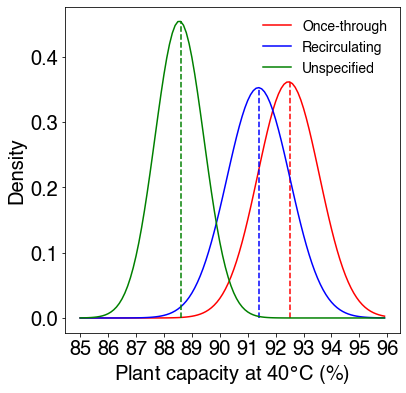

In [53]:
from scipy.stats import norm

normOT = norm.fit(ydAllOT)
normRC = norm.fit(ydAllRC)
normUnspec = norm.fit(ydAllUnspec)

xaxis = np.arange(85, 96, 0.1)
pdfOT = norm.pdf(xaxis, normOT[0], normOT[1])
pdfRC = norm.pdf(xaxis, normRC[0], normRC[1])
pdfUnspec = norm.pdf(xaxis, normUnspec[0], normUnspec[1])

xMaxOT = np.where(pdfOT==np.nanmax(pdfOT))[0]
xMaxRC = np.where(pdfRC==np.nanmax(pdfRC))[0]
xMaxUnspec = np.where(pdfUnspec==np.nanmax(pdfUnspec))[0]

plt.figure(figsize=(6,6))
plt.plot(xaxis, pdfOT, '-r', label='Once-through')
plt.plot([xaxis[xMaxOT], xaxis[xMaxOT]], [0, pdfOT[xMaxOT]], '--r')
plt.plot(xaxis, pdfRC, '-b', label='Recirculating')
plt.plot([xaxis[xMaxRC], xaxis[xMaxRC]], [0, pdfRC[xMaxRC]], '--b')
plt.plot(xaxis, pdfUnspec, '-g', label='Unspecified')
plt.plot([xaxis[xMaxUnspec], xaxis[xMaxUnspec]], [0, pdfUnspec[xMaxUnspec]], '--g')
plt.xlabel('Plant capacity at 40$\degree$C (%)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.yticks(np.arange(0, .41, .1), fontsize=20)
plt.xticks(np.arange(85, 96.1, 1), fontsize=20)

leg = plt.legend(prop = {'size':14, 'family':'Helvetica'}, loc = 'upper right')
leg.get_frame().set_linewidth(0.0)
plt.savefig('cooling-type-comparison-%s-%s.png'%(tempVar, qsVar), format='png', dpi=500, bbox_inches = 'tight', pad_inches = 0)

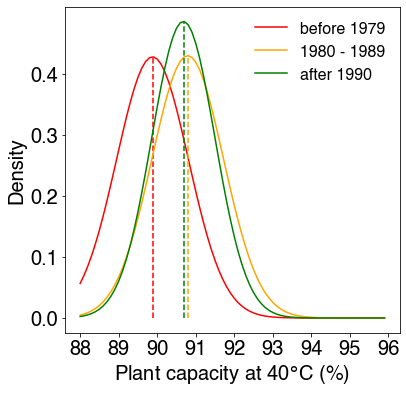

In [15]:
from scipy.stats import norm

norm1970 = norm.fit(ydAll1970)
norm1980 = norm.fit(ydAll1980)
norm1990 = norm.fit(ydAll1990)

xaxis = np.arange(88, 96, 0.1)
pdf1970 = norm.pdf(xaxis, norm1970[0], norm1970[1])
pdf1980 = norm.pdf(xaxis, norm1980[0], norm1980[1])
pdf1990 = norm.pdf(xaxis, norm1990[0], norm1990[1])

xMax1970 = np.where(pdf1970==np.nanmax(pdf1970))[0]
xMax1980 = np.where(pdf1980==np.nanmax(pdf1980))[0]
xMax1990 = np.where(pdf1990==np.nanmax(pdf1990))[0]

plt.figure(figsize=(6,6))
plt.plot(xaxis, pdf1970, '-r', label='before 1979')
plt.plot([xaxis[xMax1970], xaxis[xMax1970]], [0, pdf1970[xMax1970]], '--r')

plt.plot(xaxis, pdf1980, '-', color='orange', label='1980 - 1989')
plt.plot([xaxis[xMax1980], xaxis[xMax1980]], [0, pdf1980[xMax1980]], '--', color='orange')

plt.plot(xaxis, pdf1990, '-g', label='after 1990')
plt.plot([xaxis[xMax1990], xaxis[xMax1990]], [0, pdf1990[xMax1990]], '--g')

plt.xlabel('Plant capacity at 40$\degree$C (%)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.yticks(np.arange(0, .41, .1), fontsize=20)
plt.xticks(np.arange(88, 96.1, 1), fontsize=20)

leg = plt.legend(prop = {'size':16, 'family':'Helvetica'}, loc = 'upper right')
leg.get_frame().set_linewidth(0.0)
plt.savefig('plant-age-comparison-%s-%s.png'%(tempVar, qsVar), format='png', dpi=500, bbox_inches = 'tight', pad_inches = 0)

In [16]:
ydAll1970.shape

(100,)